In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [191]:
df = pd.DataFrame()

locations = ['local', 'remote']
types = ['control', 'attack'] 

In [203]:
def get_clean_data(name):
    input_df = pd.read_csv(f'results/{name}.csv', header=None)

    before_len = len(input_df)
    
    print("Cleaning " + name + ".csv (" + str(before_len) + " rows)")
    
    input_df = input_df[(input_df[1] == 302) & (input_df[2] == 302)]
    print(str(before_len - len(input_df)) + " rows with unexpected http codes")

    before_len = len(input_df)
    input_df = input_df[(np.abs(stats.zscore(input_df[0])) < 3)]
    print(str(before_len - len(input_df)) + " rows with outliers")
    
    return input_df[0]

for location in locations:
    for type in types:
        name = f'{location}_{type}_detail'
        
        df[name] = get_clean_data(name)

Cleaning local_control_detail.csv (485 rows)
0 rows with unexpected http codes
3 rows with outliers
Cleaning local_attack_detail.csv (490 rows)
0 rows with unexpected http codes
8 rows with outliers
Cleaning remote_control_detail.csv (505 rows)
0 rows with unexpected http codes
11 rows with outliers
Cleaning remote_attack_detail.csv (490 rows)
0 rows with unexpected http codes
4 rows with outliers


<Axes: ylabel='Density'>

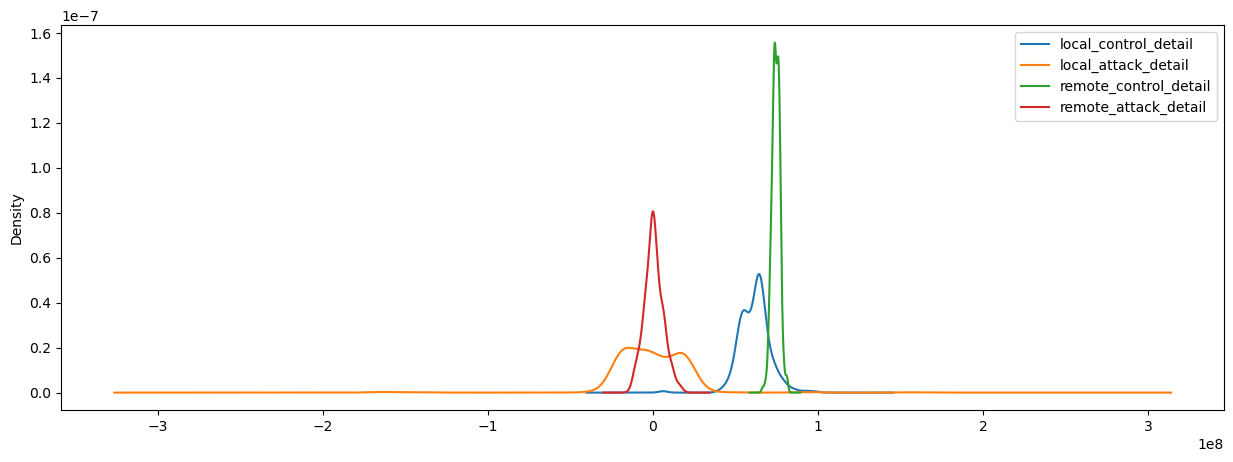

In [202]:
df.plot(kind='kde', figsize=(15,5))

In [204]:
# While the above kde chart is useful for improving our mental model of how the attack works, all a real attacker really needs to know is 
# whether responses typically arrived at about the same time. 
# Our analysis suggests that only one batch of 5 pairs is required, even in the remote (over the internet) context

# Suprised that the spread is wider for local vs. remote. Perhaps something to do with virtualisation, or some other detail of the specific
# deployment of the contrived target app. What's cool about this attack though, is that we don't care about that kind of detail at all! 
# All we care about is "did the response pairs arrive back at about the same time?". 

# As you would expect, remote probes take longer in general, vs. local

# NOTE no outlier removal etc - here we are trying to see how effective the most naive implemetantion would be. 
# I.e. how likely it is that an attack is accurate given a small sample of salvos (i.e. 5 pairs as the entire attack).  
def show_overall_result(name):
    input_df = pd.read_csv(f'results/{name}.csv', header=None)
    total_qty = len(input_df)
    suspect_email_exists_qty = len(input_df[input_df[0] == 0])

    pct = (suspect_email_exists_qty / total_qty) * 100
    
    print(f'{suspect_email_exists_qty} of {total_qty} ({pct}%) results indicate a user exists with the given email')

for location in locations:
    for type in types:
        name = f'{location}_{type}_winners'
        print(f'{location} {type}')
        show_overall_result(name)

# What is most interesting in these results is how obvious the difference between control and attack is. 
# This suggests that any single indicator in the attack data of the target user existing is probably good enough
# Itis very likely that the first salvo will be enough, and if not, only 2 or 3 should be required nuder most circumstances. 

local control
0 of 97 (0.0%) results indicate a user exists with the given email
local attack
64 of 98 (65.3061224489796%) results indicate a user exists with the given email
remote control
0 of 101 (0.0%) results indicate a user exists with the given email
remote attack
63 of 98 (64.28571428571429%) results indicate a user exists with the given email
